Un FINTECH quiere hacer un muestreo de la distribución agregada de pérdidas, esto con el finde cumplir con la normativa internacional en materia de gestión de riesgos derivado de la colocación de créditos de consumo.

Para la caracterización de la distribución agregada de pérdidas, se utilizarán como referencias las variables: Probabilidad de Default, Exposición del Activo, LGD (Garantía del Crédito).
Es importante llevar a cabo el muestreo de las variables aleatorias a una confiabilidad del 99.99%.

Método de Montecarlo: Es un método para el muestreo de variables aleatorias en función de su estructura intrínseca.
Las métricas estadísticas para el muestreo de variables aleatorias dependen enteramente de la estructura intrínseca de la distribución agregada de pérdidas. Esta estructura intrínseca esta determinada por el Histograma de Frecuencias, así como las métricas de dispersión y de tendencia central.
Tamaño de la Muestra: Indica la calidad de los datos frente a la estimación de métricas estadísticas frente a la gestión de los riesgos de una organización


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title 1. Método: Histograma de Frecuencias
# Variables de Entrada: Distribución de las Pérdidas
# Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
# Marca de Clase del Histograma de Frecuencias.
def Histx(LDA): #Nombre de su método

  NC=10  #Número de Clusters

  plt.figure()
  sns.histplot(LDA,kde=True,bins=NC,color='red')
  plt.title('Distribución LDA')
  plt.show()

  #Obtenemos la información de la Distribución
  counts, bin_edges=np.histogram(LDA,bins=NC)
  LI=bin_edges[:-1];LS=bin_edges[1:]
  mc=(LI+LS)/2 #El valor representativo de cada intervalo
  freq=counts/np.sum(counts)

  return LI,LS,counts,mc,freq

In [ ]:
df_year1 = pd.read_excel(nxl, sheet_name='Año 1')
df_year1['Year'] = 1

df_year2 = pd.read_excel(nxl, sheet_name='Año 2')
df_year2['Year'] = 2

df_year3 = pd.read_excel(nxl, sheet_name='Año 3')
df_year3['Year'] = 3

df_year4 = pd.read_excel(nxl, sheet_name='Año 4')
df_year4['Year'] = 4

# Concatenate the dataframes
XDB_years = pd.concat([df_year1, df_year2, df_year3, df_year4], ignore_index=True)

# Display the first few rows and the columns with their data types to confirm the structure
display(XDB_years.head())
print(XDB_years.columns)
print(XDB_years.dtypes)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD,Year
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573,1
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300,1
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118,1
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498,1
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469,1


Index(['Unnamed: 0', 'Edad', 'Sexo', 'Estado civil', 'Hijos', 'Perscargo',
       'Nivel Renta', 'Estrato', 'Nivel de estudios', 'Tipo de contrato',
       'Ingresos', 'Egresos', 'Tipo de actividad', 'Tipo de vivienda',
       'Total Activos', 'Total pasivos', 'Salario', 'Ingresos por arriendo',
       'Ingresos por honorarios', 'Ingresos financieros', 'Otros ingresos',
       'Gasto familiar', 'Gasto obligatorio', 'Gasto arriendo', 'Otros gastos',
       'Monto (EAD)', 'Plazo', 'Cuota (COP)', 'ConoCliente', 'Garantia',
       'RespPat', 'MoraCome', 'PreApr', 'Prob.Default (PD)', 'Score', 'LGD',
       'Year'],
      dtype='object')
Unnamed: 0                   int64
Edad                         int64
Sexo                        object
Estado civil                object
Hijos                        int64
Perscargo                    int64
Nivel Renta                  int64
Estrato                      int64
Nivel de estudios           object
Tipo de contrato            object
Ingresos 

### Carga y concatenación de datos

Este código cargamos los datos de los 4 años diferentes del exel. le agregamos una nueva columna que se llama año y lo concatenamos en XDB_years.

,LDA
Year,
1,74526.841756
2,84463.281274
3,81277.848258
4,83291.892147


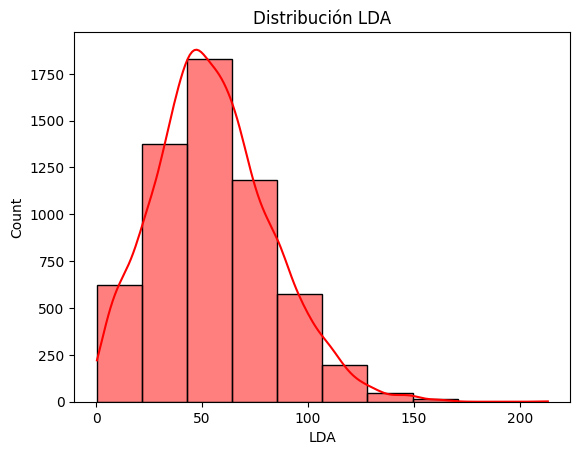

,LI,LS,ND,mc,Freq
0,0.354255,21.642307,621,10.998281,0.106281
1,21.642307,42.930359,1378,32.286333,0.235838
2,42.930359,64.218411,1828,53.574385,0.312853
3,64.218411,85.506463,1184,74.862437,0.202636
4,85.506463,106.794515,577,96.150489,0.098751
5,106.794515,128.082567,194,117.438541,0.033202
6,128.082567,149.370619,48,138.726593,0.008215
7,149.370619,170.658671,12,160.014645,0.002054
8,170.658671,191.946723,0,181.302697,0.000000
9,191.946723,213.234775,1,202.590749,0.000171


In [ ]:
# 1. Calculate the aggregate loss for each row
XDB_years['LDA'] = XDB_years['Prob.Default (PD)'] * XDB_years['Monto (EAD)'] * (1+XDB_years['LGD'])

# 2. Group the XDB_years DataFrame by the 'Year' column and 3. For each year, calculate the sum of the 'Aggregate_Loss' column.
yearly_aggregate_losses = XDB_years.groupby('Year')['LDA'].sum()

# 4. Store the yearly aggregate losses in a new DataFrame or Series for further analysis.
# The result of the groupby sum is already a Series, which is suitable for further analysis.
display(yearly_aggregate_losses)

LI,LS,counts,mc,freq=Histx(XDB_years['LDA'])
df=pd.DataFrame({'LI':LI,'LS':LS,'ND':counts,'mc':mc,'Freq':freq})
display(df)
df.to_excel('Histograma_LDA.xlsx')

**LDA por año y histograma**

Calculamos el LDA por de cada año y podemos analizar que en el año 1 fue donde el periodo donde hubo menor riesgo de cartera pasando al año 2 con el mayor riesgo de cartera de los 4 años.

Segun el histograma podemos ver que es una campana con asimetria positiva (esta tirada hacia la izquierda) y que la mayoria de las perdidas estan concentradas entre 30 y 70

9999


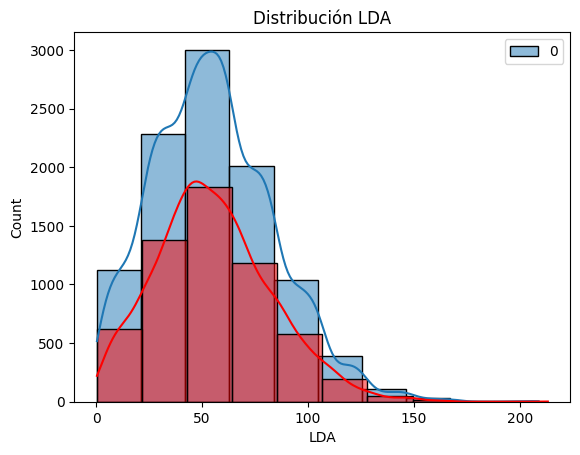

In [ ]:
acum=np.cumsum(freq)
Confiabilidad=9999 # 99.99% confidence level
print(Confiabilidad)
LDAm=np.zeros((Confiabilidad,1)) #La variable muestreada

for k in range(Confiabilidad):
  al=np.random.uniform(0,1) #Esto es un cualquiera
  inter=np.where(al<=acum)[0][0]
  #print("Limite inferior:",LI[inter])
  #print("Limite superior:",LS[inter])
  LDAm[k,]=np.random.uniform(LI[inter],LS[inter])
  #print("El numero seleccionado es:",LDAm[k,])

plt.figure()
sns.histplot(LDAm,kde=True,bins=10,color='green')
sns.histplot(XDB_years['LDA'],kde=True,bins=10,color='red')
plt.title('Distribución LDA')
plt.show()

La confibilidad la hicimos de 9999 para alcanzar el 99.99% como lo pide el taller

El rojo se refiere a la distribución simulada de Monte Carlo y el azul a los datos originales en donde podemos ver que el metodo monte carlo logro replicar casi a exactitud los datos originales, esto queire decir que es muy buen indicio.



In [ ]:
from scipy.stats import skew, kurtosis

print("Información LDA original")
print("La media es:",np.mean(XDB_years['LDA']))
print("La Varianza es:",np.var(XDB_years['LDA']))
print("El coeficiente de asimetría es:",skew(XDB_years['LDA']))
print("El coeficiente de curtosis es:",kurtosis(XDB_years['LDA']))

print("Información LDA muestreada")
print("La Media es:",np.mean(LDAm))
print("La Varianza es:",np.var(LDAm))
print("El coeficiente de asimetría es:",skew(LDAm))
print("El coeficiente de curtosis es:",kurtosis(LDAm))

#Las diferencias entre las metricas son
dif_u=(np.mean(XDB_years['LDA'])-np.mean(LDAm))/np.mean(XDB_years['LDA'])
print("La diferencia porcentual de la media es:",dif_u*100)
dif_v=(np.var(XDB_years['LDA'])-np.var(LDAm))/np.var(XDB_years['LDA'])
print("La diferencia porcentual de la varianza es:",dif_v*100)
dif_sk=(skew(XDB_years['LDA'])-skew(LDAm))/skew(XDB_years['LDA'])
print("La diferencia porcentual del coeficiente de asimetría es:",dif_sk*100)
dif_ku=(kurtosis(XDB_years['LDA'])-kurtosis(LDAm))/kurtosis(XDB_years['LDA'])
print("La diferencia porcentual del coeficiente de curtosis es:",dif_ku*100)

Información LDA original
La media es: 55.375639814324934
La Varianza es: 760.637918302277
El coeficiente de asimetría es: 0.49663294781359374
El coeficiente de curtosis es: 0.3208411432581104
Información LDA muestreada
La Media es: 55.3238712097948
La Varianza es: 844.3028285902942
El coeficiente de asimetría es: [0.51176916]
El coeficiente de curtosis es: [0.33972888]
La diferencia porcentual de la media es: 0.09348624179099764
La diferencia porcentual de la varianza es: -10.999308379834003
La diferencia porcentual del coeficiente de asimetría es: [-3.04776586]
La diferencia porcentual del coeficiente de curtosis es: [-5.88694225]


La media significa la cual es la perdida esperada tipica y en los dos nos da la misma= 55

La varianza nos quiere decir la disperción de los datos y Monte Carlo nos indica que es mas alta que el original pero no por mucho.

LA asimetría y la curtosis coinciden casi igual osea que la forma y las colas de la distribución real están bien replicadas.